# Principal Coordiante Analysis

Notebook used for testing Principal Coordinate Analysis [methodology](https://towardsdatascience.com/principal-coordinates-analysis-cc9a572ce6c?utm_source=pocket_reader) taken from Medium. According to the article:
*Principal Coordinates Analysis is a statistical method that converts data on distances between items into map-based visualization of those items.*
This uses Perceptual Mapping, which: *means that you make a geographic map, but you use an unusual distance measure.*

In this case, we are using household price listings from IIEG.

## Import libraries

In [3]:
import os
import sys

import pandas as pd
import geopandas as gpd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

module_path = os.path.abspath(os.path.join('../../../../observatorio-ciudades/accesibilidad-urbana/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

2023-01-14 21:19:19 Configured OSMnx 1.1.2
2023-01-14 21:19:19 HTTP response caching is on


## Download data

In [4]:
gdf = aup.gdf_from_db('household_sale_price_guadalajara','household_price')
print(gdf.shape)
gdf.head(4)

(85539, 10)


,Inmueble,Precio,Municipio,Colonia,x,y,geometry,year,Metros cuadrados de terreno,Metros cuadrados de construcción
0,Departamento,6476224.0,Guadalajara,LADRON DE GUEVARA,-103.372094,20.686948,POINT (-103.37209 20.68695),2019,NaN,NaN
1,Departamento,5390000.0,Zapopan,CAMINO REAL,-103.414164,20.669928,POINT (-103.41416 20.66993),2019,NaN,NaN
2,Departamento,3677233.0,Guadalajara,JARDINES DEL BOSQUE,-103.382841,20.662215,POINT (-103.38284 20.66222),2019,NaN,NaN
3,Departamento,7593583.0,Guadalajara,PROVIDENCIA,-103.379044,20.701857,POINT (-103.37904 20.70186),2019,NaN,NaN


<AxesSubplot: >

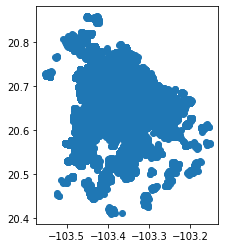

In [5]:
gdf.plot()

<AxesSubplot: >

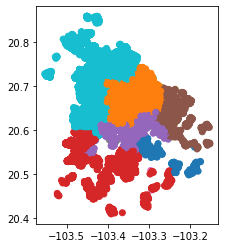

In [7]:
gdf.plot('Municipio')

In [10]:
gdf.Municipio = gdf.Municipio.str.title()
gdf.loc[gdf.Municipio=='Tonalá','Municipio'] = 'Tonala'

In [11]:
gdf[['Municipio','Precio']].groupby('Municipio').mean()

,Precio
Municipio,
El Salto,1.967447e+06
Guadalajara,5.524267e+06
Tlajomulco,5.621751e+06
Tlaquepaque,2.234478e+06
Tonala,1.468708e+06
Zapopan,8.290355e+06
